# Fashion MNIST

We will be training a Neural Network on the Fashion MINST datset using TensorFlow 2 and it's built in Keras API.

In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt

In [2]:
fashion_mnist = tf.keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_lables) = fashion_mnist.load_data()

train_images = train_images / 255.0
test_images = test_images / 255.0

In [3]:
class myCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs={}):
        if(logs.get('acc') > 0.98):
            print("Accuracy has surpassed 98% so training is being stopped")
            self.model.stop_training = True

callbacks = myCallback()

In [4]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(10, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 128)               100480    
_________________________________________________________________
dense_1 (Dense)              (None, 64)                8256      
_________________________________________________________________
dense_2 (Dense)              (None, 10)                650       
_________________________________________________________________
dense_3 (Dense)              (None, 10)                110       
Total params: 109,496
Trainable params: 109,496
Non-trainable params: 0
_________________________________________________________________


In [5]:
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['acc'])

In [6]:
split_data = int(len(test_lables) / 2)

valid_images = test_images[:split_data]
valid_labels = test_lables[:split_data]

new_test_images = test_images[split_data:]
new_test_labels = test_lables[split_data:]

In [7]:
history = model.fit(train_images, 
    train_labels, 
    epochs=20, 
    verbose=1, 
    callbacks=[callbacks], 
    validation_data=(valid_images, valid_labels))

Epoch 1/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.6328 - acc: 0.7896 - val_loss: 0.4359 - val_acc: 0.8500
Epoch 2/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3863 - acc: 0.8591 - val_loss: 0.4099 - val_acc: 0.8514
Epoch 3/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3440 - acc: 0.8740 - val_loss: 0.3795 - val_acc: 0.8626
Epoch 4/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3180 - acc: 0.8832 - val_loss: 0.3582 - val_acc: 0.8724
Epoch 5/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2991 - acc: 0.8893 - val_loss: 0.3432 - val_acc: 0.8758
Epoch 6/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2836 - acc: 0.8943 - val_loss: 0.3650 - val_acc: 0.8678
Epoch 7/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2717 - acc: 0.8978 - val_loss: 0.3446 - val_acc: 0.8758
Epoch 8/20
1875/1875 [==============================] - 4s 2ms

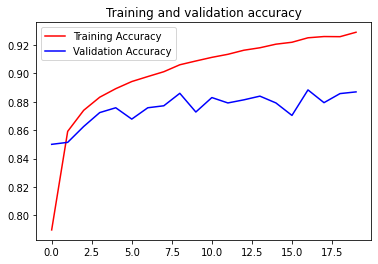

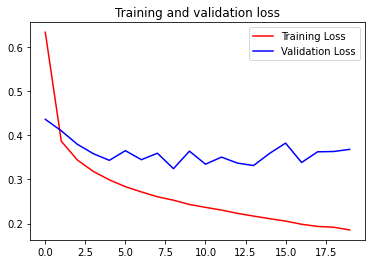

In [8]:
acc=history.history['acc']
val_acc=history.history['val_acc']
loss=history.history['loss']
val_loss=history.history['val_loss']

epochs=range(len(acc)) # Get number of epochs

#------------------------------------------------
# Plot training and validation accuracy per epoch
#------------------------------------------------
plt.plot(epochs, acc, 'r', label="Training Accuracy")
plt.plot(epochs, val_acc, 'b', label="Validation Accuracy")
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()

#------------------------------------------------
# Plot training and validation loss per epoch
#------------------------------------------------
plt.plot(epochs, loss, 'r', label="Training Loss")
plt.plot(epochs, val_loss, 'b', label="Validation Loss")


plt.title('Training and validation loss')
plt.legend()

In [ ]:
eval = model.evaluate(test_images, test_lables, verbose=1)